In [84]:
import pandas as pd #reading dataset
import matplotlib as mpl    #plotting, visualization
import matplotlib.pyplot as plt
import tensorflow as tf #building model
from tensorflow.keras.models import Model
import numpy as np  #playing output with model
from sklearn.model_selection import train_test_split    #model selection and scaling data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import sys
sys.path.append('../../')   # Add parent directory to Python path
from utils.Plots import *
RANDOM_SEED = 42


In [85]:
df = pd.read_csv('../../data/handlebar/Accelerometer_data_combined_segmented.csv') 
# df.drop('Unnamed: 0', axis=1, inplace=True)
df

,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
0,0.0,2024-07-24 10:26:02.003,2024-07-24 10:26:02.499,8.805878,8.796295,8.757996,8.781937,8.805878,8.796295,8.781937,...,8.757996,8.757996,8.762772,8.757996,8.762772,8.767563,8.738831,8.757996,8.743622,8.772354
1,0.0,2024-07-24 10:26:02.503,2024-07-24 10:26:02.995,8.767563,8.748413,8.753204,8.767563,8.777145,8.781937,8.748413,...,8.777145,8.767563,8.796295,8.810669,8.781937,8.781937,8.757996,8.801086,8.762772,8.757996
2,0.0,2024-07-24 10:26:03.002,2024-07-24 10:26:03.497,8.767563,8.767563,8.772354,8.757996,8.786728,8.777145,8.781937,...,8.777145,8.753204,8.777145,8.767563,8.762772,8.786728,8.734055,8.786728,8.753204,8.786728
3,0.0,2024-07-24 10:26:03.502,2024-07-24 10:26:03.999,8.748413,8.777145,8.767563,8.757996,8.757996,8.757996,8.767563,...,8.762772,8.767563,8.772354,8.801086,8.796295,8.791504,8.781937,8.796295,8.781937,8.781937
4,0.0,2024-07-24 10:26:04.004,2024-07-24 10:26:04.497,8.753204,8.767563,8.748413,8.767563,8.767563,8.772354,8.772354,...,8.786728,8.762772,8.762772,8.767563,8.743622,8.729263,8.743622,8.777145,8.781937,8.791504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4422,1.0,2024-07-24 11:07:59.132,2024-07-24 11:07:59.497,-9.054871,-9.054871,-17.180786,-21.806396,-20.963638,-3.620026,-12.349289,...,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798,-6.770798
4423,1.0,2024-07-24 11:08:33.627,2024-07-24 11:08:33.995,-22.697037,-22.697037,-24.578873,-24.578873,-23.151932,-11.784256,6.440399,...,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062,21.610062
4424,1.0,2024-07-24 11:08:51.500,2024-07-24 11:08:51.932,19.646820,18.617310,15.653290,14.911087,28.629868,33.657684,32.556350,...,15.849609,8.700531,10.860092,10.860092,11.185715,11.616669,11.616669,11.616669,11.616669,11.616669
4425,1.0,2024-07-24 11:09:36.075,2024-07-24 11:09:36.497,13.508087,13.508087,13.177689,17.094604,18.507187,18.507187,20.657180,...,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523,5.645523


In [86]:
# 0 for normal, 1 for abnormal
df['curb_scene'].value_counts()

curb_scene
0.0    4351
1.0      76
Name: count, dtype: int64

In [87]:
#spilt data using sklearn, train data with label now to spilt later
train_data, test_data, train_labels, test_labels = train_test_split(df, df['curb_scene'], test_size=0.2, random_state=RANDOM_SEED)
train_data


,curb_scene,start_time,end_time,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,...,Acc-Z_91,Acc-Z_92,Acc-Z_93,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100
1264,0.0,2024-07-24 10:44:10.006,2024-07-24 10:44:10.495,8.508987,8.762772,8.451538,8.432373,8.456314,8.437164,8.930374,...,8.853760,9.160217,8.987839,8.585602,8.532928,8.734055,9.021347,8.877701,8.628708,8.513779
1907,0.0,2024-07-24 10:49:46.502,2024-07-24 10:49:46.996,12.880798,9.131485,8.303085,5.343857,8.619125,9.777924,6.047760,...,6.100433,19.369095,17.899048,10.036499,0.416595,7.340622,13.642166,14.346054,2.738968,0.689529
436,0.0,2024-07-24 10:32:51.500,2024-07-24 10:32:51.995,8.983047,6.449982,15.251068,10.673355,3.653549,5.999863,8.858551,...,1.604111,4.879379,11.353302,26.317062,22.170303,8.365341,0.205902,0.014359,16.338028,21.863846
3963,0.0,2024-07-24 11:07:55.502,2024-07-24 11:07:55.999,8.164230,10.376465,10.754761,14.130585,11.894394,6.354217,7.254425,...,12.627014,5.966354,12.124237,9.581589,14.609421,10.386047,0.770935,-1.666367,-0.632065,12.085938
2698,0.0,2024-07-24 10:56:38.502,2024-07-24 10:56:38.995,8.671799,8.638275,8.652649,8.643066,8.662216,8.652649,8.638275,...,8.638275,8.647858,8.667007,8.647858,8.628708,8.633499,8.652649,8.647858,8.643066,8.652649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0.0,2024-07-24 11:03:20.001,2024-07-24 11:03:20.494,8.628708,8.619125,8.633499,8.623917,8.614334,8.619125,8.633499,...,8.628708,8.628708,8.628708,8.614334,8.623917,8.614334,8.623917,8.619125,8.633499,8.633499
466,0.0,2024-07-24 10:33:41.001,2024-07-24 10:33:41.498,10.534485,12.612656,11.415558,9.481033,7.733276,12.310989,13.575119,...,6.627152,4.280838,10.457871,13.541611,11.789047,7.489059,4.113236,10.180145,9.481033,11.420349
3092,0.0,2024-07-24 11:00:10.016,2024-07-24 11:00:10.499,33.523620,33.523620,11.453857,26.671402,0.258575,-2.068588,12.923904,...,11.745956,7.814682,2.715027,2.097321,-1.182739,6.847412,2.092529,6.148315,7.733276,7.733276
3772,0.0,2024-07-24 11:06:13.003,2024-07-24 11:06:13.469,6.421249,1.541870,-0.354340,12.607864,19.833572,19.287690,8.681381,...,-1.958450,-8.801086,-0.181961,-11.214447,-16.060303,-16.060303,-16.060303,-16.060303,-16.060303,-16.060303


In [88]:
#scaling data, because neural network works better with scaled data
scaler = StandardScaler()
data_scaled = scaler.fit(train_data.iloc[:, 3:])
#transform data
train_data_scaled = scaler.transform(train_data.iloc[:, 3:])
test_data_scaled = scaler.transform(test_data.iloc[:, 3:])
print(train_data_scaled.shape)
# Convert the scaled data back to DataFrames for further processing
train_data_scaled_df = pd.DataFrame(train_data_scaled, columns=train_data.columns[3:])
test_data_scaled_df = pd.DataFrame(test_data_scaled, columns=test_data.columns[3:])
# Add the 'curb_scene', 'start_time', and 'end_time' columns back to the scaled DataFrames
train_data_scaled_df['curb_scene'] = train_data['curb_scene'].values
train_data_scaled_df['start_time'] = train_data['start_time'].values
train_data_scaled_df['end_time'] = train_data['end_time'].values
test_data_scaled_df['curb_scene'] = test_data['curb_scene'].values
test_data_scaled_df['start_time'] = test_data['start_time'].values
test_data_scaled_df['end_time'] = test_data['end_time'].values

(3541, 100)


In [89]:
train_data_scaled_df

,Acc-Z_1,Acc-Z_2,Acc-Z_3,Acc-Z_4,Acc-Z_5,Acc-Z_6,Acc-Z_7,Acc-Z_8,Acc-Z_9,Acc-Z_10,...,Acc-Z_94,Acc-Z_95,Acc-Z_96,Acc-Z_97,Acc-Z_98,Acc-Z_99,Acc-Z_100,curb_scene,start_time,end_time
0,-0.077586,-0.019429,-0.051801,-0.046601,-0.048889,-0.066245,0.010383,-0.017694,-0.017907,0.017460,...,-0.086602,-0.110731,-0.041839,0.051800,0.009214,-0.076786,-0.119340,0.0,2024-07-24 10:44:10.006,2024-07-24 10:44:10.495
1,0.705338,0.050710,-0.076074,-0.525048,-0.020618,0.185437,-0.512087,0.081780,-0.193974,-0.273198,...,0.233693,-1.907588,-0.349582,1.030244,1.201682,-1.347336,-1.839351,0.0,2024-07-24 10:49:46.502,2024-07-24 10:49:46.996
2,0.007311,-0.459386,1.059988,0.300554,-0.882853,-0.523765,-0.002635,1.730321,0.742169,-0.782878,...,3.827736,2.908418,-0.123271,-1.814842,-1.923588,1.586288,2.815415,0.0,2024-07-24 10:32:51.500,2024-07-24 10:32:51.995
3,-0.139326,0.287540,0.324798,0.836120,0.548109,-0.457247,-0.293381,-0.623361,-0.605846,0.034752,...,0.133269,1.234531,0.323007,-1.695198,-2.290098,-2.074544,0.665930,0.0,2024-07-24 11:07:55.502,2024-07-24 11:07:55.999
4,-0.048428,-0.043112,-0.018917,-0.013962,-0.013135,-0.025795,-0.042560,-0.083474,-0.071355,-0.069819,...,-0.072859,-0.089527,-0.064047,-0.026271,-0.040907,-0.073689,-0.088812,0.0,2024-07-24 10:56:38.502,2024-07-24 10:56:38.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,-0.056145,-0.046755,-0.022048,-0.016928,-0.021450,-0.032088,-0.043425,-0.086684,-0.076072,-0.077231,...,-0.080259,-0.090587,-0.068280,-0.032355,-0.047172,-0.075753,-0.093022,0.0,2024-07-24 11:03:20.001,2024-07-24 11:03:20.494
3537,0.285150,0.712926,0.432845,0.115849,-0.174439,0.660934,0.852237,-0.223060,-0.807065,-0.014653,...,1.007470,0.610134,-0.316799,-0.987477,0.293234,0.107079,0.519613,0.0,2024-07-24 10:33:41.001,2024-07-24 10:33:41.498
3538,4.402145,4.690774,0.439107,2.778840,-1.472366,-2.038342,0.734206,1.214502,-0.578336,-0.782878,...,-1.518933,-2.261662,-0.458509,-1.415355,-0.585974,-0.269951,-0.290919,0.0,2024-07-24 11:00:10.016,2024-07-24 11:00:10.499
3539,-0.451467,-1.393046,-1.491646,0.600232,1.926688,1.970572,-0.034747,-0.681924,-1.135620,0.206017,...,-4.457595,-5.555373,-5.517732,-5.259159,-5.428941,-5.402763,-5.521479,0.0,2024-07-24 11:06:13.003,2024-07-24 11:06:13.469


In [90]:
# Filter and slice the data
normal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_train_data_scaled = train_data_scaled_df[train_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
normal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 0.0].values[:, :-3]
abnormal_test_data_scaled = test_data_scaled_df[test_data_scaled_df['curb_scene'] == 1.0].values[:, :-3]
# Debug: Print the shapes to verify the slicing
print("Normal Train Data Shape:", normal_train_data_scaled.shape)
print("Abnormal Train Data Shape:", abnormal_train_data_scaled.shape)
print("Normal Test Data Shape:", normal_test_data_scaled.shape)
print("Abnormal Test Data Shape:", abnormal_test_data_scaled.shape)

Normal Train Data Shape: (3476, 100)
Abnormal Train Data Shape: (65, 100)
Normal Test Data Shape: (875, 100)
Abnormal Test Data Shape: (11, 100)


In [ ]:

normal_train_data_scaled_nach, normal_val_data_scaled = train_test_split(
    normal_train_data_scaled, 
    test_size=0.10, 
    random_state=RANDOM_SEED
)


In [117]:
print(normal_train_data_scaled_nach.dtypes)
#print(normal_val_data_scaled)


AttributeError: 'numpy.ndarray' object has no attribute 'dtypes'

In [118]:
normal_train_data_scaled.type()

AttributeError: 'numpy.ndarray' object has no attribute 'type'

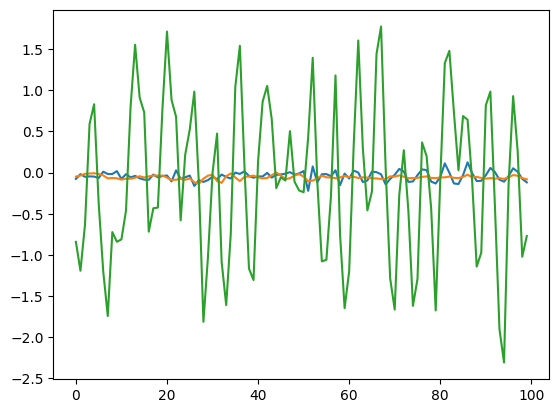

In [102]:
#See normal data ecg
plt.plot(normal_train_data_scaled[0])
plt.plot(normal_train_data_scaled[500])
plt.plot(normal_train_data_scaled[600])

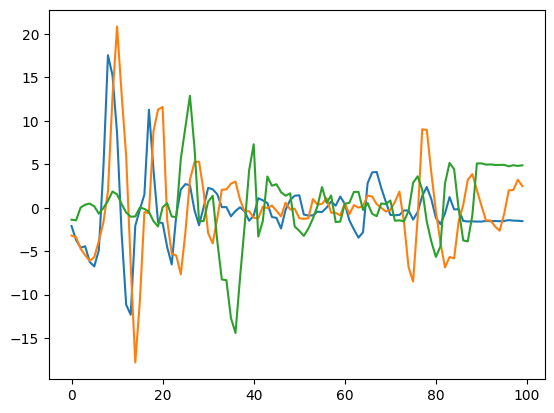

In [103]:
# #see abnormal data
plt.plot(abnormal_train_data_scaled[10])
plt.plot(abnormal_train_data_scaled[20])
plt.plot(abnormal_train_data_scaled[30])


In [105]:
#Allow me to use data in different ways
class AutoEncoder(Model):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(8, activation='relu')
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(100, activation='sigmoid')
        ])
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        #returns me a decoder object
        return decoded

In [112]:
#define model
model = AutoEncoder()
#if in 2 Epochs, loss is not decreasing, stop the training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')
model.compile(optimizer='adam', loss='mae')

In [113]:
# seprate class as well for normal and abnormal data invalidation data
history = model.fit(normal_train_data_scaled_nach, normal_train_data_scaled_nach,epochs=50, batch_size=128,
                    validation_data=(normal_val_data_scaled, normal_val_data_scaled), 
                    shuffle=True, callbacks=[early_stopping])

ValueError: Invalid dtype: object

In [114]:
#normal data
#Encoder is bottleneck of 8 Units, decoder is reconstructed output of 100 units
encoder_out = model.encoder(normal_test_data_scaled).numpy()
decoder_out = model.decoder(encoder_out).numpy()
plt.plot(normal_test_data_scaled[0], 'blue')
plt.plot(decoder_out[0], 'red')

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [115]:
# abnormal data
encoder_out_abnormal = model.encoder(abnormal_test_data_scaled).numpy()
decoder_out_abnormal = model.decoder(encoder_out_abnormal).numpy()
plt.plot(abnormal_test_data_scaled[2], 'blue')
plt.plot(decoder_out_abnormal[2], 'red')

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [116]:
reconstruction = model.predict(normal_test_data_scaled)    #output error between input and output
train_loss = tf.keras.losses.mae(reconstruction, normal_test_data_scaled)
plt.hist(train_loss, bins=50)

ValueError: Invalid dtype: object

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(array([1., 1., 1., 1., 1., 1., 2., 0., 2., 0., 1., 0., 1., 0., 1., 0., 2.,
        2., 3., 2., 2., 2., 1., 1., 3., 1., 1., 0., 0., 0., 1., 3., 0., 2.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([1.02821577, 1.11112532, 1.19403487, 1.27694442, 1.35985398,
        1.44276353, 1.52567308, 1.60858264, 1.69149219, 1.77440174,
        1.85731129, 1.94022085, 2.0231304 , 2.10603995, 2.1889495 ,
        2.27185906, 2.35476861, 2.43767816, 2.52058771, 2.60349727,
        2.68640682, 2.76931637, 2.85222592, 2.93513548, 3.01804503,
        3.10095458, 3.18386413, 3.26677369, 3.34968324, 3.43259279,
        3.51550234, 3.5984119 , 3.68132145, 3.764231  , 3.84714055,
        3.93005011, 4.01295966, 4.09586921, 4.17877876, 4.26168832,
        4.34459787, 4.42750742, 4.51041697, 4.59332653, 4.67623608,
        4.75914563, 4.84205518, 4.92496474, 5.00787429, 5.09078384,
        5.17369339]),
 <BarContainer object of 50 artists>)

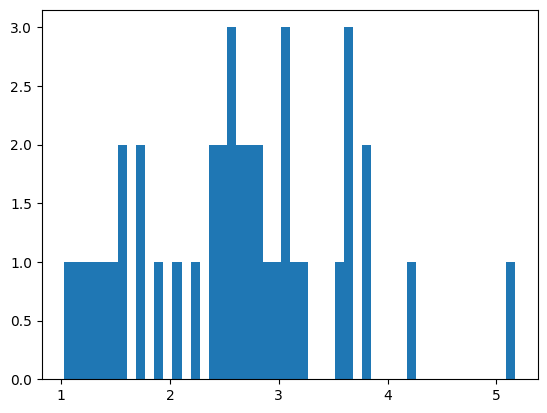

In [23]:
reconstruction_abnormal = model.predict(abnormal_test_data_scaled)
train_loss_abnormal = tf.keras.losses.mae(reconstruction_abnormal, abnormal_test_data_scaled)
plt.hist(train_loss_abnormal, bins=50)

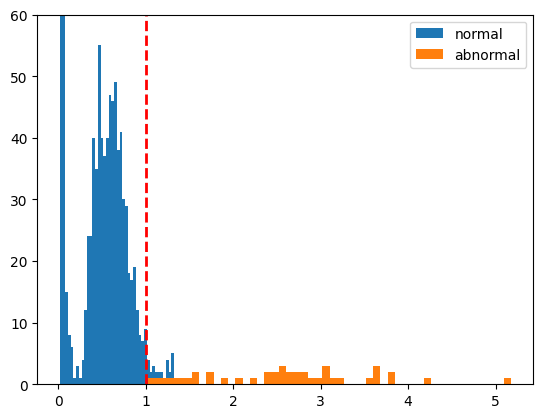

In [24]:
threadshold = 1
plt.hist(train_loss, bins=50, label='normal')
plt.hist(train_loss_abnormal, bins=50, label='abnormal')
plt.ylim(0, 60)
plt.legend()
plt.axvline(threadshold, color='r', linestyle='dashed', linewidth=2,label = '{:0.3f}'.format(threadshold))
plt.show()

In [22]:
preds=tf.math.less(train_loss, threadshold)
correct = tf.math.count_nonzero(preds)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds))

Correct Predictions:  1024
Accuracy:  0.9678638941398866


In [27]:
preds_abnormal=tf.math.greater(train_loss_abnormal, threadshold)
correct = tf.math.count_nonzero(preds_abnormal)
print("Correct Predictions: ", correct.numpy())
print("Accuracy: ", correct.numpy()/len(preds_abnormal))

Correct Predictions:  41
Accuracy:  1.0
